# **Proyecto Final.**

## Problema de Negocio 
Una institución financiera busca fortalecer sus estrategias de prevención de lavado de dinero (PLD) mediante el desarrollo de un modelo que clasifique a sus clientes en niveles de riesgo. Esta clasificación permitirá priorizar recursos de auditoría e investigación, así como cumplir con los requerimientos normativos de forma más eficiente.


## Objetivo del proyecto

Aplicar técnicas de reducción de dimensionalidad (PCA) y clustering (K-Means) para clasificar a los clientes en mínimo tres niveles de riesgo: bajo, medio y alto. Este modelo permitirá al banco automatizar la identificación de posibles casos sospechosos, reducir falsos positivos y optimizar el monitoreo operativo.


## Pipeline Analítico

1. **Recolección y Preparación de Datos**  
Datos de transacciones históricas por cliente (monto, frecuencia, tipo, canal, país, etc.).  
Variables adicionales: antigüedad del cliente, ingresos declarados, productos contratados, etc.  
Limpieza de datos: valores nulos, outliers, escalado (normalización o estandarización).  

2. **Reducción de Dimensionalidad con PCA**  
Estándarización de las variables numéricas.  
Aplicación de PCA para entender las dimensiones principales (2D o 3D para visualización).  
Análisis de varianza explicada para determinar cuántos componentes conservar.  

3. **Segmentación con K-Means**  
Aplicación de K-Means con k=6 para agrupar clientes.  
Asignación de etiquetas: Bajo, Medio, Alto (basado en características dentro del cluster).  

4. **Análisis y Etiquetado de Clusters**  
Perfilamiento de cada cluster: ¿qué lo caracteriza?   
Validación del modelo con expertos de negocio / reglas heurísticas.



### **1. Cargar librerías.**

In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from  matplotlib.colors import LinearSegmentedColormap


### **2. Cargar y preparar datos.**


In [8]:
df = pd.read_csv('Clientes_IR.csv', encoding = 'latin1', dtype = {'ClienteIDE': str})
df.head()


,ClienteIDE,IR_TipoPersona,IR_Nacionalidad,IR_Edad,IR_ActEconom,IR_PaisResidencia,IR_Estado,IR_Municipio,IR_Producto,IR_Divisa,IR_Antigüedad,IR_Instrumento,IR_FrecDep,IR_FrecRet,IR_OrigenRec,IR_DestinoRecursos,IR_PaisOrgen,IR_PaisDestino,IR_VolumenEfectivoOperado
0,00100016,3,1,1,1,1,2,1,1,1,3,2,1,1,1,3,1,1,1
1,00100017,3,1,2,1,1,2,1,1,1,3,2,1,2,1,3,1,1,2
2,00100034,3,1,1,1,1,2,1,1,1,3,2,1,1,1,3,1,1,1
3,00100735,3,1,1,1,1,2,1,1,1,3,2,1,1,1,1,1,1,1
4,00100950,3,1,1,1,1,2,1,1,1,3,2,1,1,1,1,1,1,1


#### **2.1 Exploración de datos.**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492114 entries, 0 to 492113
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ClienteIDE                 492114 non-null  object
 1   IR_TipoPersona             492114 non-null  int64 
 2   IR_Nacionalidad            492114 non-null  int64 
 3   IR_Edad                    492114 non-null  int64 
 4   IR_ActEconom               492114 non-null  int64 
 5   IR_PaisResidencia          492114 non-null  int64 
 6   IR_Estado                  492114 non-null  int64 
 7   IR_Municipio               492114 non-null  int64 
 8   IR_Producto                492114 non-null  int64 
 9   IR_Divisa                  492114 non-null  int64 
 10  IR_Antigüedad              492114 non-null  int64 
 11  IR_Instrumento             492114 non-null  int64 
 12  IR_FrecDep                 492114 non-null  int64 
 13  IR_FrecRet                 492114 non-null  

In [11]:
df.describe()

,IR_TipoPersona,IR_Nacionalidad,IR_Edad,IR_ActEconom,IR_PaisResidencia,IR_Estado,IR_Municipio,IR_Producto,IR_Divisa,IR_Antigüedad,IR_Instrumento,IR_FrecDep,IR_FrecRet,IR_OrigenRec,IR_DestinoRecursos,IR_PaisOrgen,IR_PaisDestino,IR_VolumenEfectivoOperado
count,492114.000000,492114.000000,492114.000000,492114.000000,492114.0,492114.000000,492114.000000,492114.000000,492114.0,492114.0,492114.000000,492114.000000,492114.000000,492114.000000,492114.000000,492114.0,492114.0,492114.000000
mean,2.987271,1.001138,2.248871,1.055894,1.0,2.120049,1.751505,1.000100,1.0,3.0,2.037656,1.255394,1.223186,1.000085,2.862394,1.0,1.0,1.076779
std,0.129918,0.033775,0.718366,0.329641,0.0,0.465800,0.907893,0.009978,0.0,0.0,0.190363,0.483895,0.470985,0.009668,0.497297,0.0,0.0,0.272226
min,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,3.0,2.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
25%,3.000000,1.000000,2.000000,1.000000,1.0,2.000000,1.000000,1.000000,1.0,3.0,2.000000,1.000000,1.000000,1.000000,3.000000,1.0,1.0,1.000000
50%,3.000000,1.000000,2.000000,1.000000,1.0,2.000000,1.000000,1.000000,1.0,3.0,2.000000,1.000000,1.000000,1.000000,3.000000,1.0,1.0,1.000000
75%,3.000000,1.000000,3.000000,1.000000,1.0,2.000000,3.000000,1.000000,1.0,3.0,2.000000,1.000000,1.000000,1.000000,3.000000,1.0,1.0,1.000000
max,3.000000,3.000000,3.000000,3.000000,1.0,3.000000,3.000000,2.000000,1.0,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,1.0,1.0,3.000000


In [12]:
# Correlación entre columnas numéricas
correlacion = df.corr()
correlacion


,ClienteIDE,IR_TipoPersona,IR_Nacionalidad,IR_Edad,IR_ActEconom,IR_PaisResidencia,IR_Estado,IR_Municipio,IR_Producto,IR_Divisa,IR_Antigüedad,IR_Instrumento,IR_FrecDep,IR_FrecRet,IR_OrigenRec,IR_DestinoRecursos,IR_PaisOrgen,IR_PaisDestino,IR_VolumenEfectivoOperado
ClienteIDE,1.000000,0.061262,0.008077,0.093492,0.000155,NaN,0.072168,0.002275,-0.008073,NaN,NaN,0.001668,-0.042937,-0.048126,-0.006776,0.334793,NaN,NaN,-0.052695
IR_TipoPersona,0.061262,1.000000,0.000522,0.032397,-0.014798,NaN,0.002652,0.005124,-0.028806,NaN,NaN,0.014369,0.007524,0.008868,-0.003989,0.024125,NaN,NaN,0.026541
IR_Nacionalidad,0.008077,0.000522,1.000000,-0.010165,0.001223,NaN,0.001521,0.004782,-0.000336,NaN,NaN,0.002185,-0.003235,-0.003447,-0.000297,0.007750,NaN,NaN,-0.003093
IR_Edad,0.093492,0.032397,-0.010165,1.000000,-0.055310,NaN,-0.008288,-0.000994,-0.000906,NaN,NaN,-0.006877,0.038688,0.011266,-0.002766,0.037986,NaN,NaN,-0.057643
IR_ActEconom,0.000155,-0.014798,0.001223,-0.055310,1.000000,NaN,-0.001801,-0.003102,0.002015,NaN,NaN,0.004671,-0.024904,-0.015352,-0.001497,0.031002,NaN,NaN,0.009876
IR_PaisResidencia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IR_Estado,0.072168,0.002652,0.001521,-0.008288,-0.001801,NaN,1.000000,0.170968,-0.000823,NaN,NaN,-0.021144,-0.019601,-0.010980,0.000883,0.034533,NaN,NaN,-0.035014
IR_Municipio,0.002275,0.005124,0.004782,-0.000994,-0.003102,NaN,0.170968,1.000000,0.000040,NaN,NaN,0.002950,0.023329,0.022292,0.000333,-0.002928,NaN,NaN,0.013641
IR_Producto,-0.008073,-0.028806,-0.000336,-0.000906,0.002015,NaN,-0.000823,0.000040,1.000000,NaN,NaN,-0.000904,0.006517,0.006514,-0.000088,-0.015667,NaN,NaN,0.002422
IR_Divisa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


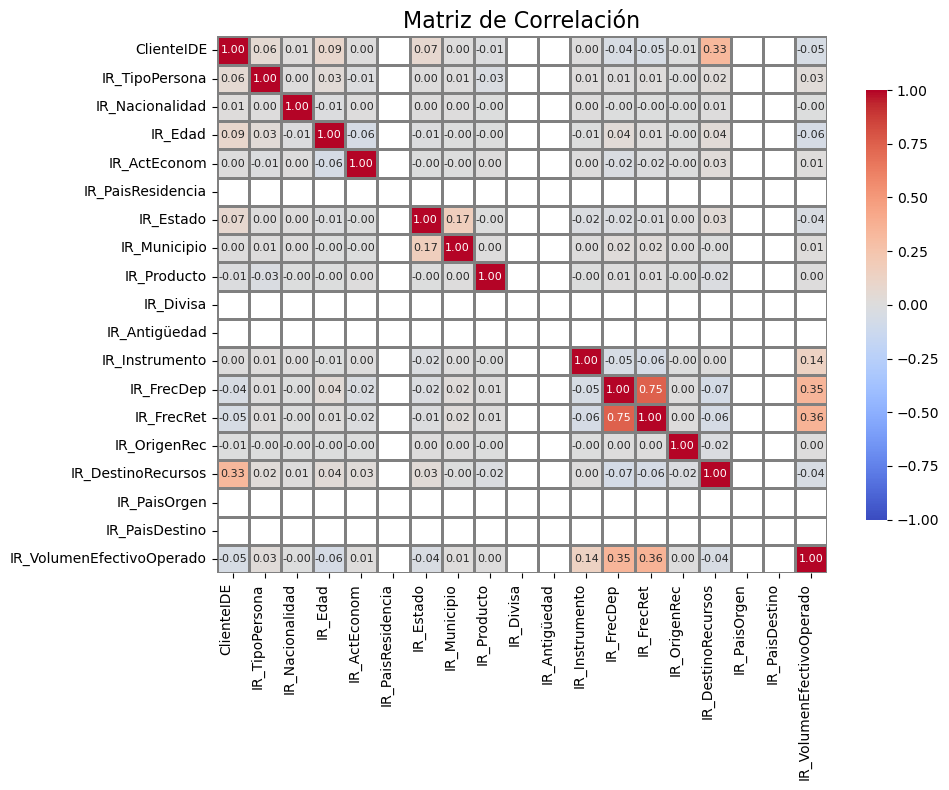

In [13]:
# Crear una figura más grande para mejor visualización
plt.figure(figsize = (10, 8))

# Mapa de calor con ajustes de formato
sns.heatmap(correlacion, annot = True, cmap = 'coolwarm', fmt = '.2f', 
            vmin = -1, vmax = 1, center = 0, linewidths = 1, linecolor = 'gray',
            cbar_kws = {'shrink': 0.8},
            annot_kws = {'size': 8})

# Mejorar la legibilidad
plt.title('Matriz de Correlación', fontsize = 16)
plt.xticks(rotation = 90, ha='right', fontsize = 10)  # Rotación de las etiquetas del eje x
plt.yticks(rotation = 0, fontsize = 10)  # Etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajusta los elementos para que no se sobrepongan

# Mostrar el gráfico
plt.show()


Para el análisis de clúster no se consideran los siguientes factores:
- País Residencia
- Divisa
- Antigüedad
- País Origen
- País Destino

Toda vez que se tiene el mismo valor para todos los clientes y no ayuda a diferenciar características de los clientes.

In [15]:
# Seleccionar variables numéricas
df_num = df.select_dtypes(include = [np.number])
df_num.head()


,IR_TipoPersona,IR_Nacionalidad,IR_Edad,IR_ActEconom,IR_PaisResidencia,IR_Estado,IR_Municipio,IR_Producto,IR_Divisa,IR_Antigüedad,IR_Instrumento,IR_FrecDep,IR_FrecRet,IR_OrigenRec,IR_DestinoRecursos,IR_PaisOrgen,IR_PaisDestino,IR_VolumenEfectivoOperado
0,3,1,1,1,1,2,1,1,1,3,2,1,1,1,3,1,1,1
1,3,1,2,1,1,2,1,1,1,3,2,1,2,1,3,1,1,2
2,3,1,1,1,1,2,1,1,1,3,2,1,1,1,3,1,1,1
3,3,1,1,1,1,2,1,1,1,3,2,1,1,1,1,1,1,1
4,3,1,1,1,1,2,1,1,1,3,2,1,1,1,1,1,1,1


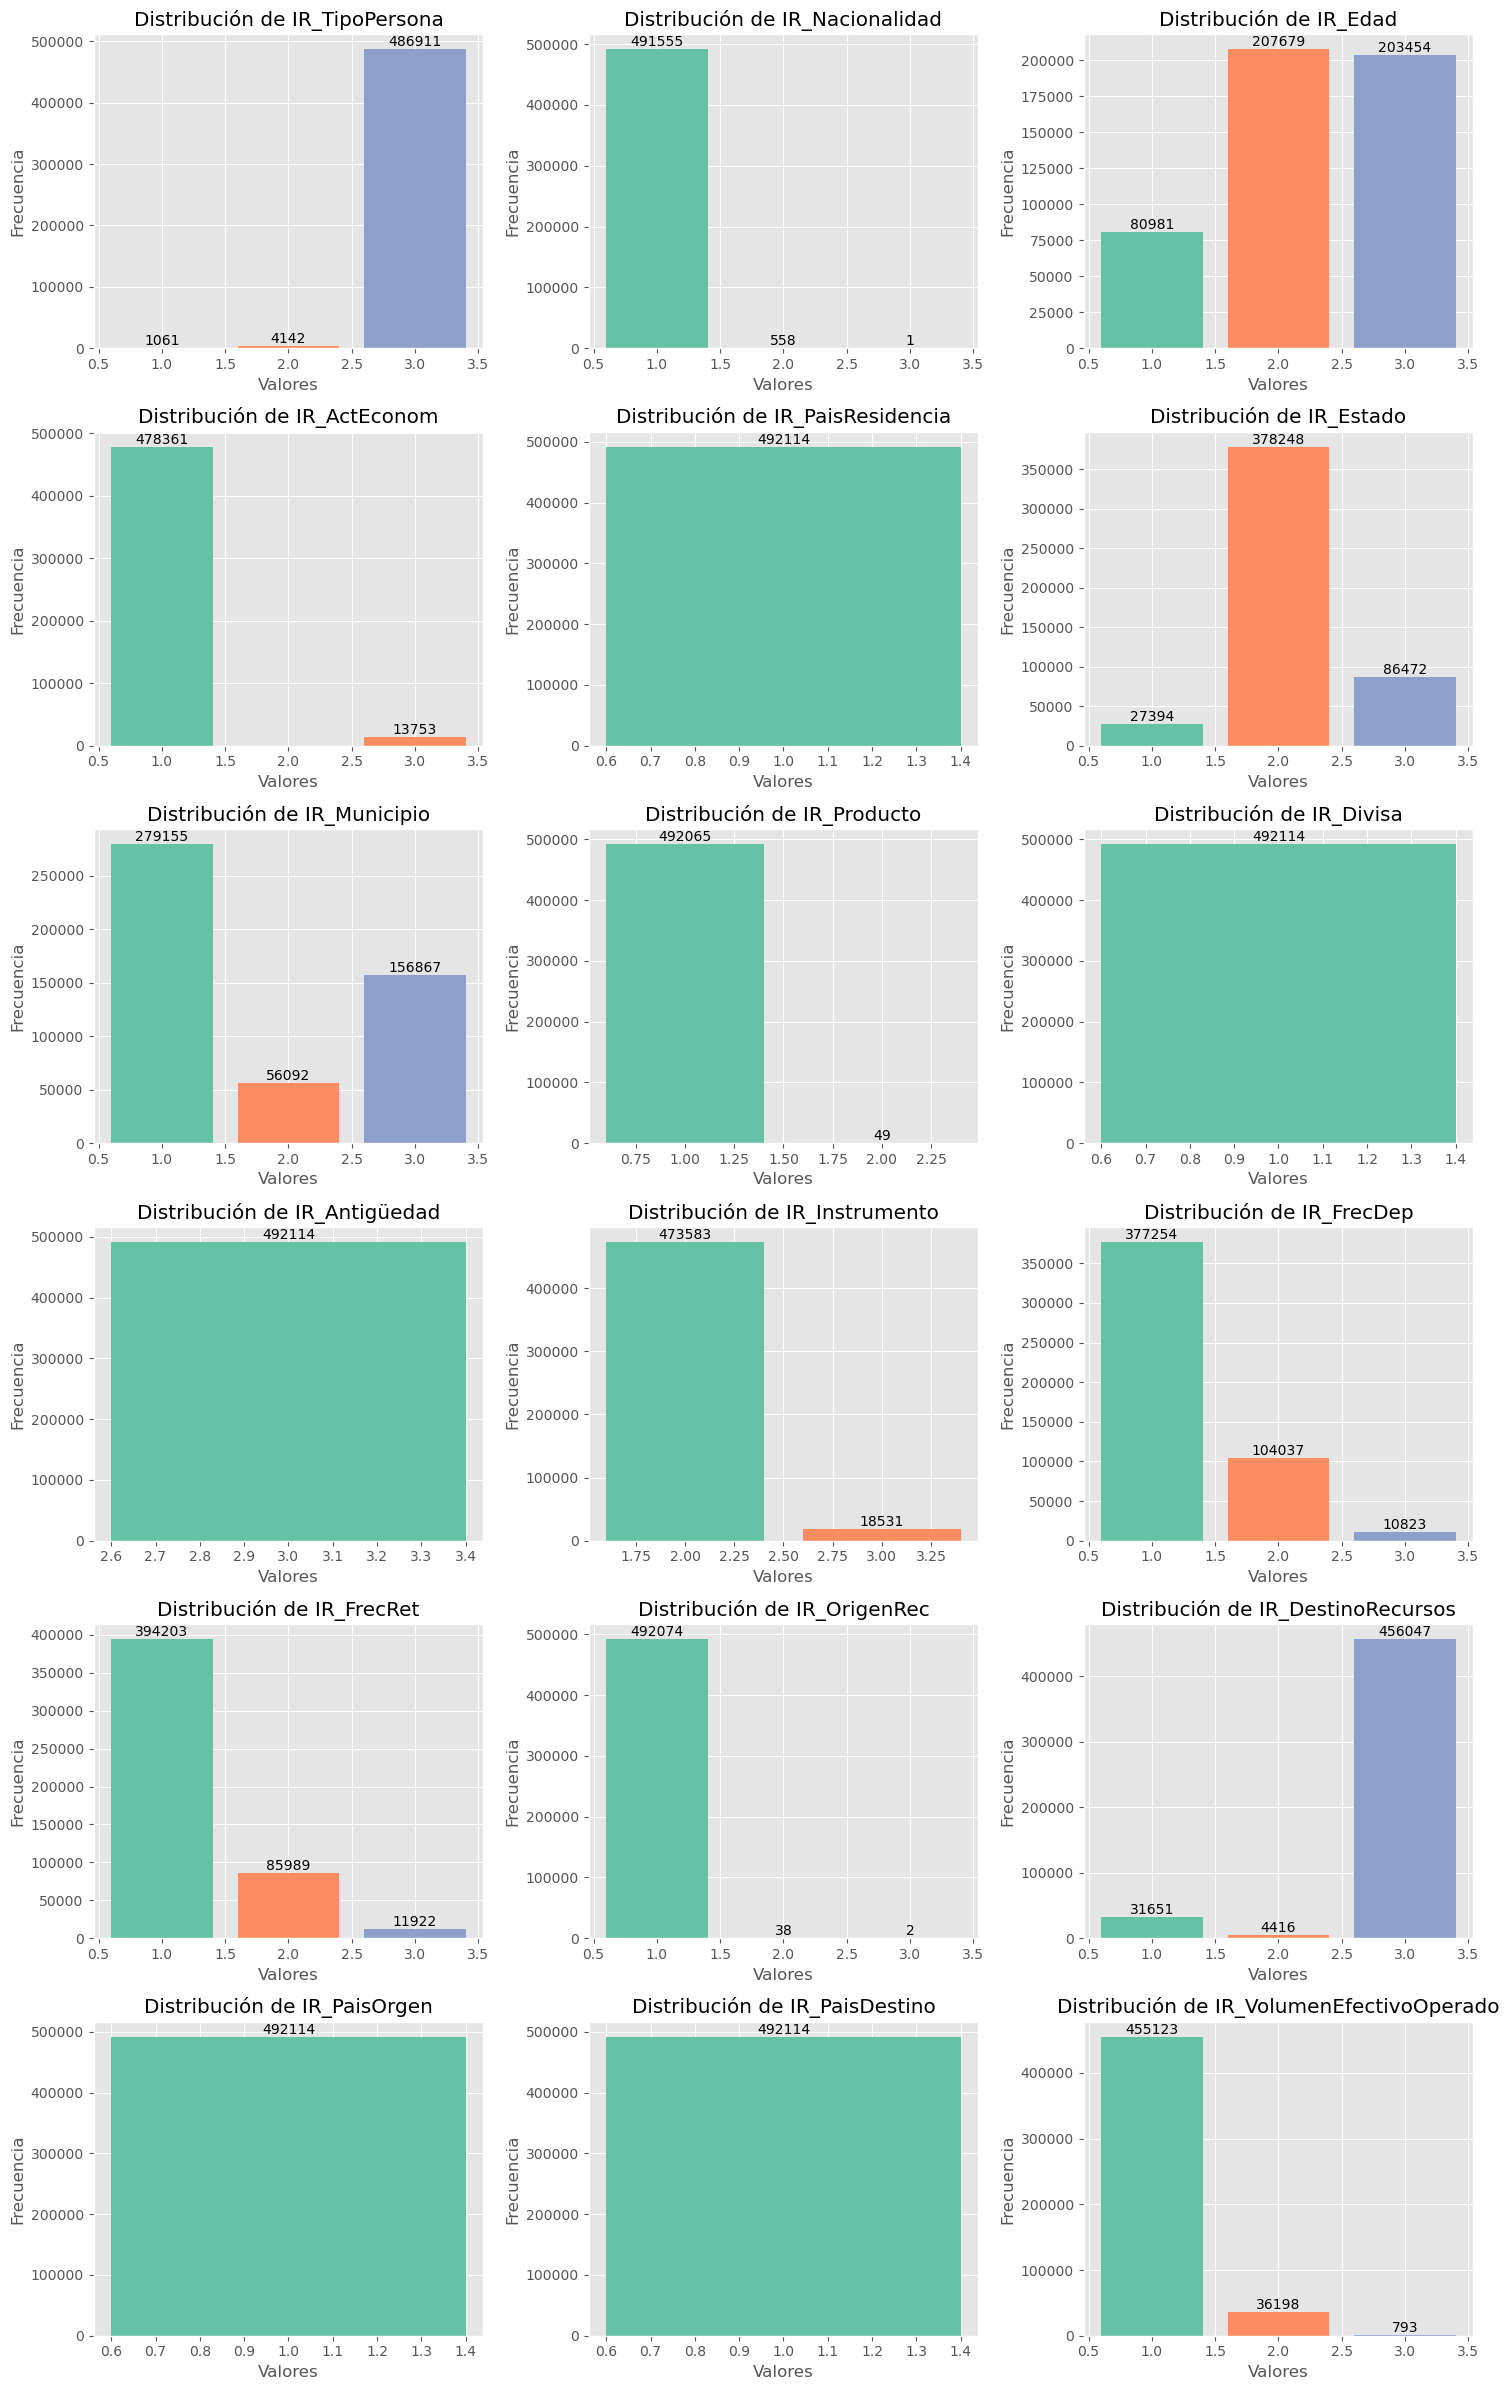

In [16]:
plt.style.use("ggplot")

num_vars = len(df_num.columns)
nrows, ncols = 6, 3

fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (15, 24))
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    value_counts = df_num[col].value_counts().sort_index()
    categories = value_counts.index
    counts = value_counts.values

    colors = sns.color_palette("Set2", n_colors = len(categories))
    axes[i].bar(categories, counts, color = colors)

    # Agregar etiquetas de conteo
    for j, count in enumerate(counts):
        axes[i].text(categories[j], count, str(count), ha = 'center', va = 'bottom', 
                     fontsize = 10, color = 'black')

    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel("Valores")
    axes[i].set_ylabel("Frecuencia")

# Ocultar los ejes vacíos si hay menos de 18
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### **2.2 Escalar los datos.**

In [18]:
# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)


### **3. Aplicar PCA**

#### **3.1 Obtener el número óptimo de componentes.**

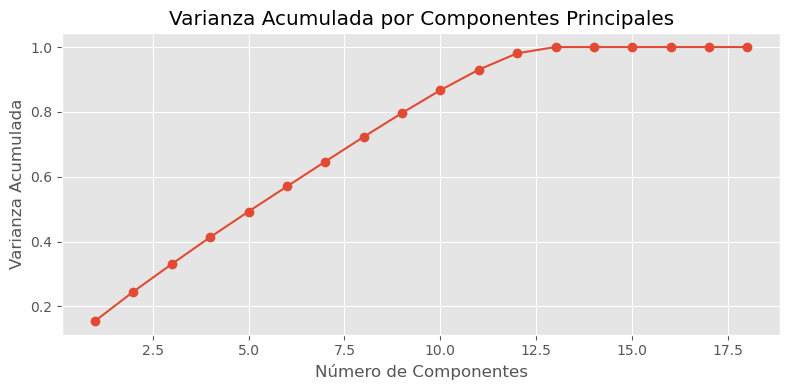

In [21]:
# Visualizar PCA (antes del clustering)
pca_temp = PCA()
pca_temp.fit(df_scaled)
explained_var = np.cumsum(pca_temp.explained_variance_ratio_)

plt.figure(figsize = (8, 4))
plt.plot(range(1, len(explained_var)+1), explained_var, marker = 'o')
plt.title('Varianza Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.grid(True)
plt.tight_layout()
plt.show()


✅ **Número óptimo de componentes:**

- Se observa que la curva sube rápidamente al inicio y luego se estabiliza cerca de 1.
- A partir de aproximadamente 10 componentes, la varianza acumulada está por encima del 90%-95%, lo que indica que estos 10 componentes explican casi toda la información original de los datos.
- Usar más de 10-12 componentes no aportaría un valor significativo adicional, ya que la curva se aplana.
  

#### **3.2 PCA**

In [24]:
pca = PCA(n_components = 10)
df_pca = pca.fit_transform(df_scaled)

# Crear DataFrame con los componentes principales
df_pca_df = pd.DataFrame(data = df_pca, columns = [f'PCA{i+1}' for i in range(10)])


/var/folders/ct/cf8v_6td4sjd6_m0d5bnd1mc0000gn/T/ipykernel_13038/3402706224.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Componente', y='Varianza Explicada', data=pca_importance_df, palette='viridis')


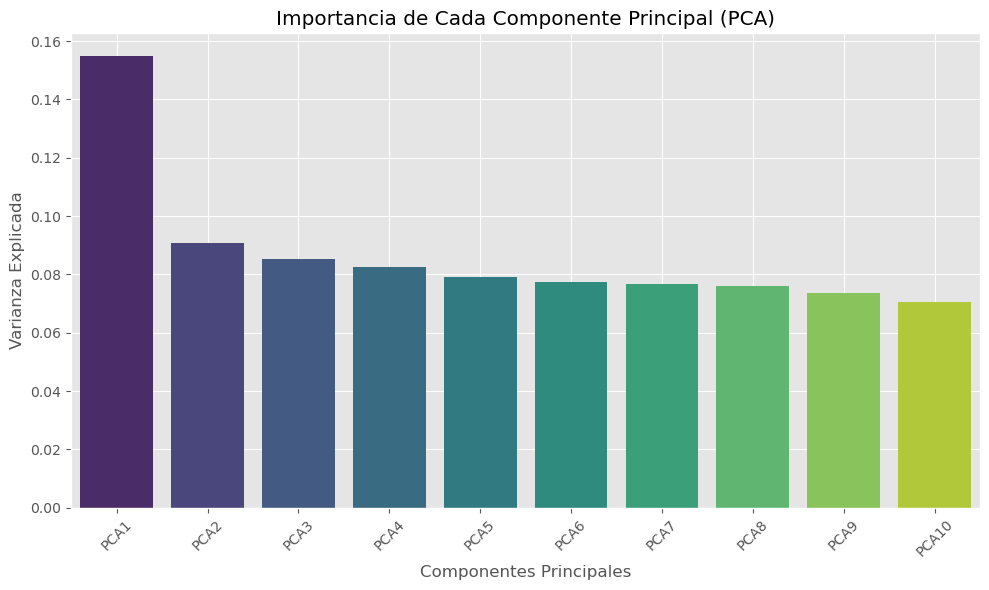

In [25]:
# Analizar la importancia de cada componente PCA

# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Crear un DataFrame para visualizar la contribución de cada componente
pca_importance_df = pd.DataFrame({
    'Componente': [f'PCA{i+1}' for i in range(len(explained_variance))],
    'Varianza Explicada': explained_variance
})

# Visualizar la contribución de cada PCA
plt.figure(figsize=(10, 6))
sns.barplot(x='Componente', y='Varianza Explicada', data=pca_importance_df, palette='viridis')
plt.title('Importancia de Cada Componente Principal (PCA)')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### **4. Aplicar K-Means con k = 6**

La Institución deció que quiere un modelo que asigne a los clientes en 6 diferentes niveles:
- 1 → Bajo
- 2 → Inter 1
- 3 → Inter 2
- 4 → Inter 3
- 5 → Inter 4
- 6 → Alto

In [28]:
kmeans = KMeans(n_clusters = 6, random_state = 42, n_init = 10)

# Usamos los 10 componentes principales de PCA
clusters = kmeans.fit_predict(df_pca) + 1  # Ajuste para que los clústeres sean de 1 a 6


In [29]:
# Agregar las etiquetas de cluster al DataFrame
df['Cluster'] = clusters
df_pca_df['Cluster'] = clusters


In [30]:
df.head()

,ClienteIDE,IR_TipoPersona,IR_Nacionalidad,IR_Edad,IR_ActEconom,IR_PaisResidencia,IR_Estado,IR_Municipio,IR_Producto,IR_Divisa,IR_Antigüedad,IR_Instrumento,IR_FrecDep,IR_FrecRet,IR_OrigenRec,IR_DestinoRecursos,IR_PaisOrgen,IR_PaisDestino,IR_VolumenEfectivoOperado,Cluster
0,00100016,3,1,1,1,1,2,1,1,1,3,2,1,1,1,3,1,1,1,2
1,00100017,3,1,2,1,1,2,1,1,1,3,2,1,2,1,3,1,1,2,1
2,00100034,3,1,1,1,1,2,1,1,1,3,2,1,1,1,3,1,1,1,2
3,00100735,3,1,1,1,1,2,1,1,1,3,2,1,1,1,1,1,1,1,6
4,00100950,3,1,1,1,1,2,1,1,1,3,2,1,1,1,1,1,1,1,6


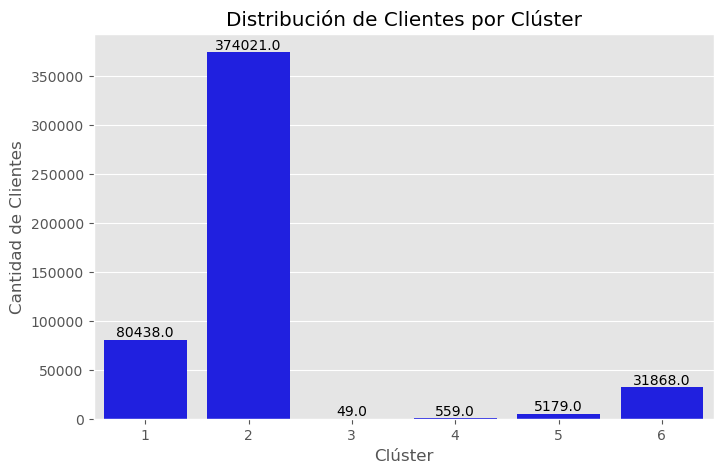

In [31]:
plt.figure(figsize = (8, 5))

# Crear el gráfico de conteo con un nuevo color 
ax = sns.countplot(x = df["Cluster"], color = "blue")

# Agregar etiquetas de datos encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', fontsize = 10, color = 'black')

plt.xlabel("Clúster")
plt.ylabel("Cantidad de Clientes")
plt.title("Distribución de Clientes por Clúster")
plt.xticks(rotation = 0)  # Mantener etiquetas horizontales
plt.show()


#### **4.1. Visualización de los centroides en PCA**

/var/folders/ct/cf8v_6td4sjd6_m0d5bnd1mc0000gn/T/ipykernel_13038/2810497954.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


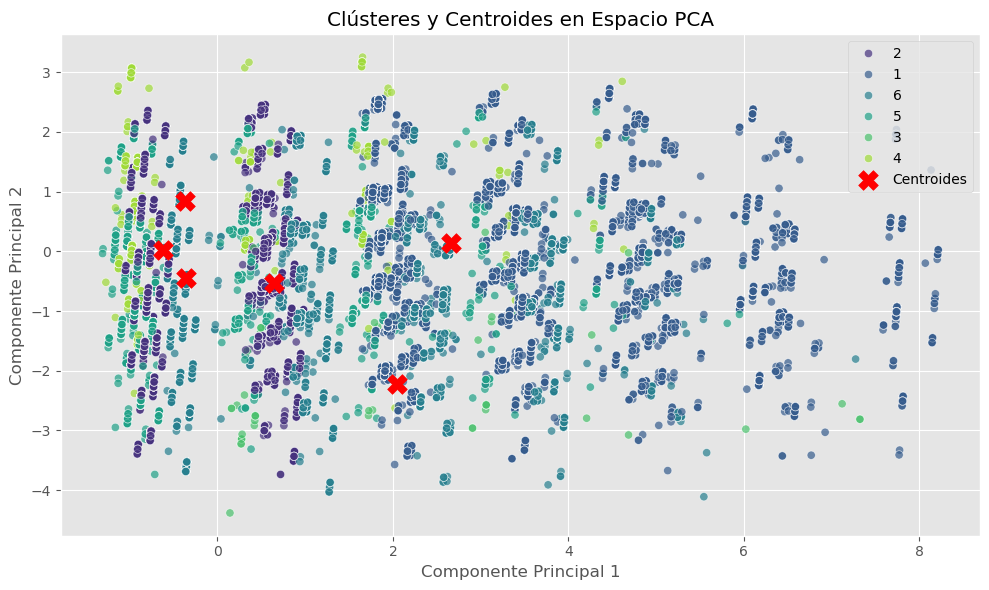

In [33]:
plt.figure(figsize = (10, 6))
sns.scatterplot(
    x = 'PCA1', y = 'PCA2',
    hue = df_pca_df['Cluster'].astype(str),
    palette = 'viridis',
    data = df_pca_df,
    alpha = 0.7
)

# Centroides en el espacio PCA
centroids = kmeans.cluster_centers_[:, :2]  # Solo tomamos las primeras 2 dimensiones para graficar
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', s = 200, marker = 'X', label = 'Centroides')
plt.title('Clústeres y Centroides en Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


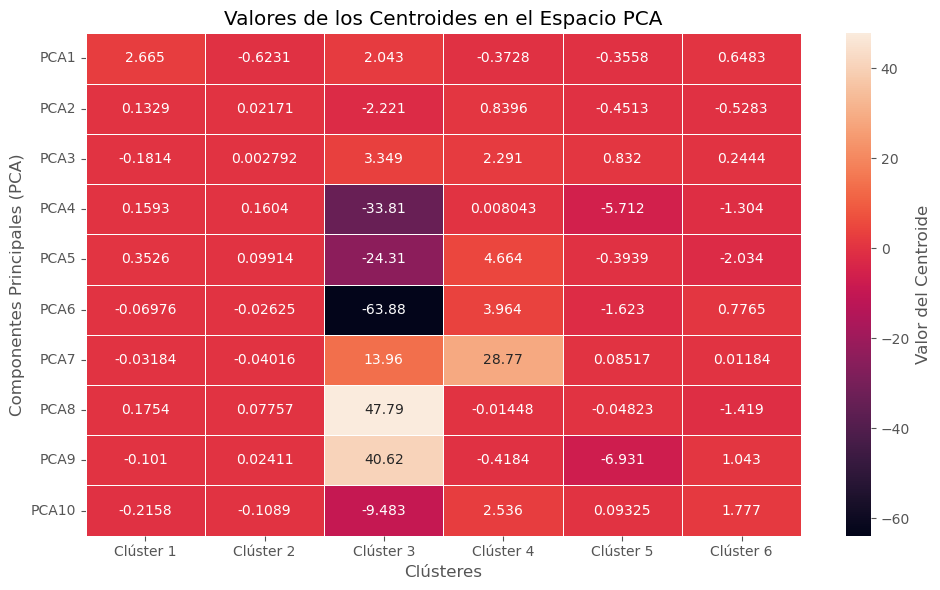

In [34]:
# Extraer los centroides del modelo entrenado
centroids = kmeans.cluster_centers_

# Convertirlos en DataFrame
centroid_df = pd.DataFrame(centroids, columns=[f'PCA{i+1}' for i in range(10)])

# Transponer para mejor visualización (variables en filas, clusters en columnas)
centroid_df = centroid_df.T
centroid_df.columns = [f'Clúster {i+1}' for i in range(centroid_df.shape[1])]

# Graficar heatmap
plt.figure(figsize = (10, 6))
ax = sns.heatmap(centroid_df, 
                 #cmap = "RdYlGn",  # Colores de rojo a verde
                 annot = True, 
                 fmt = ".4g",  # Formato numérico con 4 decimales
                 linewidths = 0.5, 
                 cbar_kws = {'label': 'Valor del Centroide'}
)

plt.title("Valores de los Centroides en el Espacio PCA")
plt.xlabel("Clústeres")
plt.ylabel("Componentes Principales (PCA)")
plt.yticks(rotation = 0)  # Mantener etiquetas de variables horizontales
plt.tight_layout()
plt.show()


#### **4.2 Obtener los centroides en escala original.**

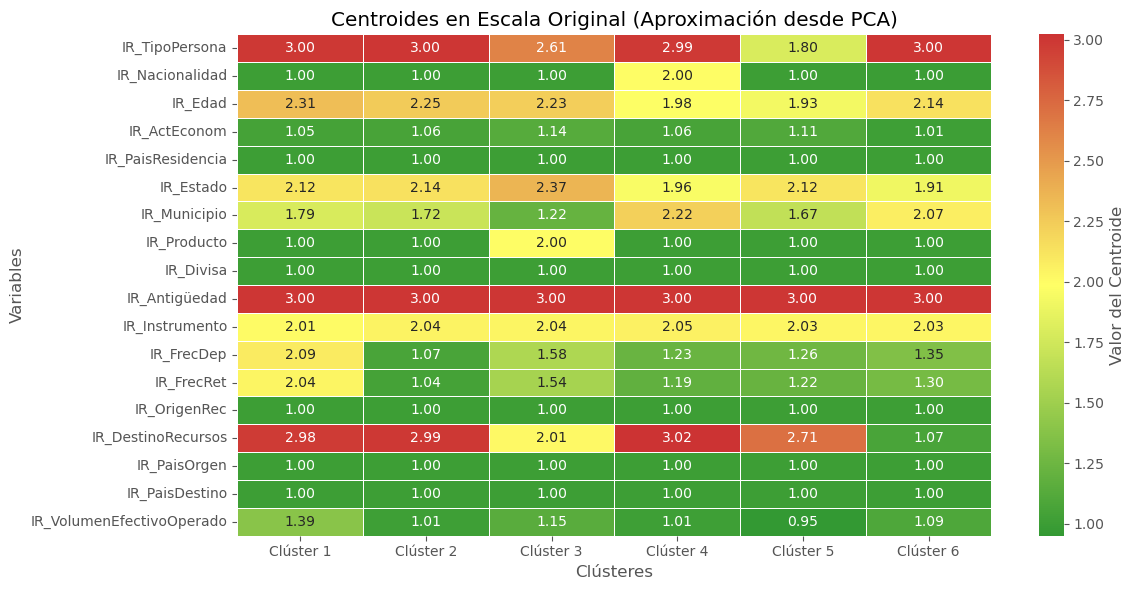

In [36]:
# Obtener los centroides en el espacio PCA
centroids_pca = kmeans.cluster_centers_

# Invertir la transformación PCA → vuelve al espacio escalado
centroids_scaled = pca.inverse_transform(centroids_pca)

# Invertir el escalado → vuelve al espacio original
centroids_original = scaler.inverse_transform(centroids_scaled)

# Crear DataFrame interpretable
centroid_df = pd.DataFrame(centroids_original, columns = df_num.columns)
centroid_df = centroid_df.T
centroid_df.columns = [f'Clúster {i+1}' for i in range(centroid_df.shape[1])]

# Visualización
# Crear el colormap personalizado verde -> amarillo -> rojo
colors = [(0.2, 0.6, 0.2), (1, 1, 0.4), (0.8, 0.2, 0.2)]      # Verde -> Amarillo -> Rojo
n_bins = 256        # Número de colores en el colormap
cmap_name = "green_yellow_red"
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N = n_bins)

plt.figure(figsize = (12, 6))
sns.heatmap(centroid_df, cmap = cm, annot=True, fmt = ".2f", linewidths = 0.5,
            cbar_kws = {'label': 'Valor del Centroide'})
plt.title("Centroides en Escala Original (Aproximación desde PCA)")
plt.xlabel("Clústeres")
plt.ylabel("Variables")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [37]:
centroid_df

,Clúster 1,Clúster 2,Clúster 3,Clúster 4,Clúster 5,Clúster 6
IR_TipoPersona,2.998619,3.000297,2.613016,2.989915,1.796846,2.999739
IR_Nacionalidad,1.000083,1.000014,1.000674,2.001300,0.999969,0.999640
IR_Edad,2.313980,2.249332,2.233910,1.977207,1.926871,2.136244
IR_ActEconom,1.045523,1.061468,1.136425,1.060571,1.106340,1.008246
IR_PaisResidencia,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
IR_Estado,2.117569,2.138823,2.366787,1.957600,2.117193,1.908905
IR_Municipio,1.786269,1.716940,1.216649,2.223700,1.672692,2.074777
IR_Producto,0.999999,0.999996,1.999908,1.000059,0.999994,1.000048
IR_Divisa,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
IR_Antigüedad,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


### **5. Asignar nivel de riesgo a cada clúster**

Número de Clústeres: 6

Asignación de Nivel de Riesgo por Clúster:
     Clúster  Puntaje de Riesgo Nivel de Riesgo
0  Clúster 5          19.797025            Bajo
1  Clúster 6          19.974924    Intermedio 1
2  Clúster 2          21.323461    Intermedio 2
3  Clúster 3          21.878869    Intermedio 3
4  Clúster 4          22.723429    Intermedio 4
5  Clúster 1          23.762111            Alto


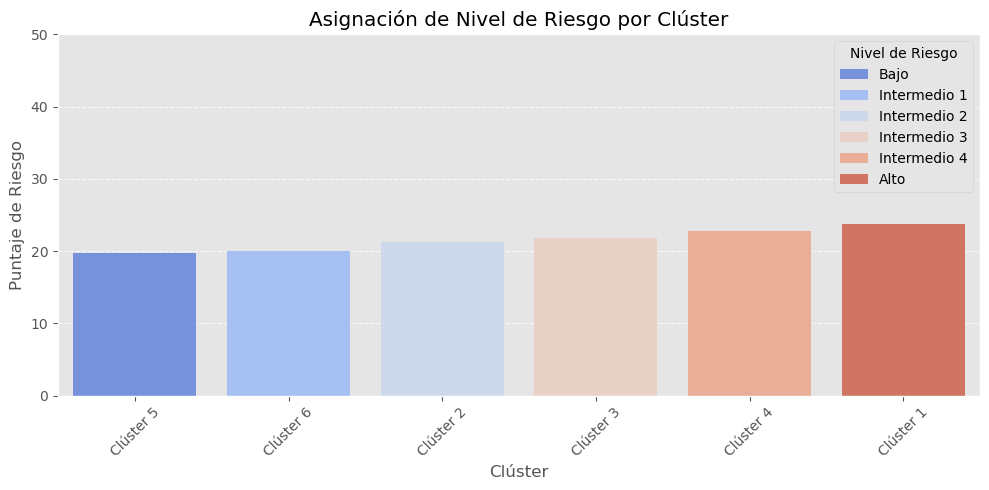

In [39]:
# ================================
# Seleccionar variables clave para evaluar el riesgo
variables_riesgo = ["IR_TipoPersona", "IR_Nacionalidad", "IR_Edad", "IR_ActEconom", "IR_Estado", 
                    "IR_Municipio", "IR_Producto", "IR_Instrumento", "IR_FrecDep", "IR_FrecRet", 
                    "IR_OrigenRec", "IR_DestinoRecursos", "IR_VolumenEfectivoOperado"]

# Filtrar solo las variables de riesgo existentes en la base de datos
variables_existentes = [var for var in variables_riesgo if var in centroid_df.index]

# Verificar que hay variables de riesgo válidas
if not variables_existentes:
    raise ValueError("❌ Ninguna de las variables de riesgo está presente en la base de datos.")

# ================================
# Calcular el puntaje de riesgo por clúster
# Sumar los valores de las variables de riesgo para cada clúster
puntaje_riesgo = centroid_df.loc[variables_existentes].sum()

# Ordenar los clústeres por puntaje de riesgo (de menor a mayor)
riesgo_ordenado = puntaje_riesgo.sort_values()

# Verificar la cantidad de clusters
num_clusters = len(riesgo_ordenado)
print(f"Número de Clústeres: {num_clusters}")

# ================================
# Asignar etiquetas de nivel de riesgo
niveles_riesgo = ["Bajo", "Intermedio 1", "Intermedio 2", "Intermedio 3", "Intermedio 4", "Alto"]

# Crear un DataFrame con la asignación de riesgo
asignacion_riesgo = pd.DataFrame({
    "Clúster": riesgo_ordenado.index,
    "Puntaje de Riesgo": riesgo_ordenado.values,
    "Nivel de Riesgo": niveles_riesgo[:num_clusters]  # Ajustar dinámicamente a la cantidad de clusters
})

# ================================
# Mostrar la asignación de riesgos en tabla
print("\nAsignación de Nivel de Riesgo por Clúster:")
print(asignacion_riesgo)

# ================================
# Visualización de Niveles de Riesgo
plt.figure(figsize = (10, 5))
sns.barplot(x = asignacion_riesgo["Clúster"], y = asignacion_riesgo["Puntaje de Riesgo"],
            hue = asignacion_riesgo["Nivel de Riesgo"], palette = "coolwarm")
plt.title("Asignación de Nivel de Riesgo por Clúster")
plt.xlabel("Clúster")
plt.ylabel("Puntaje de Riesgo")
plt.xticks(rotation = 45)
plt.legend(title = "Nivel de Riesgo")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.ylim(0, 50)
plt.tight_layout()
plt.show()


### **6. Asignar Nivel de Riesgo a los Clientes**

In [41]:
# Crear una copia del DataFrame original
df_clientes_riesgo = df.copy()


In [42]:
# Agregar columna de clúster
df_clientes_riesgo['Cluster'] = clusters

# Crear una columna auxiliar para que coincida con el formato de 'Clúster' en asignacion_riesgo
df_clientes_riesgo['Clúster'] = 'Clúster ' + df_clientes_riesgo['Cluster'].astype(str)

# Hacer merge con asignacion_riesgo para traer el Nivel de Riesgo
df_clientes_riesgo = df_clientes_riesgo.merge(
    asignacion_riesgo[['Clúster', 'Nivel de Riesgo']],
    on='Clúster',
    how='left'
)


In [43]:
# Renombrar la columna para que sea más cómoda de usar (opcional)
df_clientes_riesgo.rename(columns={'Nivel de Riesgo': 'Nivel_Riesgo'}, inplace=True)

# Mostrar los primeros registros
df_clientes_riesgo.head()


,ClienteIDE,IR_TipoPersona,IR_Nacionalidad,IR_Edad,IR_ActEconom,IR_PaisResidencia,IR_Estado,IR_Municipio,IR_Producto,IR_Divisa,...,IR_FrecDep,IR_FrecRet,IR_OrigenRec,IR_DestinoRecursos,IR_PaisOrgen,IR_PaisDestino,IR_VolumenEfectivoOperado,Cluster,Clúster,Nivel_Riesgo
0,00100016,3,1,1,1,1,2,1,1,1,...,1,1,1,3,1,1,1,2,Clúster 2,Intermedio 2
1,00100017,3,1,2,1,1,2,1,1,1,...,1,2,1,3,1,1,2,1,Clúster 1,Alto
2,00100034,3,1,1,1,1,2,1,1,1,...,1,1,1,3,1,1,1,2,Clúster 2,Intermedio 2
3,00100735,3,1,1,1,1,2,1,1,1,...,1,1,1,1,1,1,1,6,Clúster 6,Intermedio 1
4,00100950,3,1,1,1,1,2,1,1,1,...,1,1,1,1,1,1,1,6,Clúster 6,Intermedio 1


### **7. Exportar resultados**

In [45]:
# Crear carpeta para guardar los archivos
output_folder = "Resultados_Riesgo"

# Verificar si la carpeta existe, si no, crearla
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"📂 Carpeta creada: {output_folder}")
else:
    print(f"📂 La carpeta ya existe: {output_folder}")
    

📂 La carpeta ya existe: Resultados_Riesgo


In [46]:
# Exportar tabla de importancia de PCA
pca_importance_df.to_csv(os.path.join(output_folder,'PCA_importancia.csv'), index = False, encoding = 'utf-8-sig')

# Exportar los valores de los centroides
centroid_df.to_csv(os.path.join(output_folder, 'Centroides.csv'), index = False, encoding = 'utf-8-sig')

# Exportar la asignación de riesgos a CSV
asignacion_riesgo.to_csv(os.path.join(output_folder,'Asignacion_Nivel_Riesgo.csv'), index = False, encoding = 'utf-8-sig')

# Exportar archivo con la información completa
df_clientes_riesgo.to_csv(os.path.join(output_folder,"Clientes_Con_Clusters_y_Riesgo.csv"), index = False, encoding = "utf-8-sig")

print("Archivos exportados correctamente:")
print("- PCA_importancia.csv")
print("- Centroides.csv")
print("- Asignacion_Nivel_Riesgo.csv")
print("- Clientes_Con_Clusters_y_Riesgo.csv")


Archivos exportados correctamente:
- PCA_importancia.csv
- Centroides.csv
- Asignacion_Nivel_Riesgo.csv
- Clientes_Con_Clusters_y_Riesgo.csv
